In [1]:
!git clone https://github.com/sirimiri13/auto-derain.git
%cd auto-derain
!bash setup.sh /kaggle/working/auto-derain

Cloning into 'auto-derain'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 72 (delta 38), reused 54 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (72/72), 27.76 KiB | 1.85 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/kaggle/working/auto-derain
🚀 Setting up Auto-Derain in /kaggle/working/auto-derain
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have 

In [2]:
RLP_WEIGHTS = "/kaggle/input/unet-checkpoints/Uformer_T_RLP_RPIM.pth"
NERD_WEIGHTS = "/kaggle/input/model_small_rain200l/pytorch/default/1/model_small_Rain200L.pth"
MIX_IMG_DIR="/kaggle/input/data-mix-rain-with-gt/data_mix/test"
MIX_GT_DIR="/kaggle/input/data-mix-rain-with-gt/data_mix/gt"
OUTPUT_DIR_MULTI="/kaggle/working/multi/results/mix"


### Run test inference


In [3]:
!python test.py {MIX_IMG_DIR} {OUTPUT_DIR_MULTI} {RLP_WEIGHTS} {NERD_WEIGHTS} {MIX_GT_DIR}

🚀 Auto-Derain Test
📂 Input: /kaggle/input/data-mix-rain-with-gt/data_mix/test
📁 Output: /kaggle/working/multi/results/mix
🌙 RLP weights: /kaggle/input/unet-checkpoints/Uformer_T_RLP_RPIM.pth
☀️ NeRD weights: /kaggle/input/model_small_rain200l/pytorch/default/1/model_small_Rain200L.pth
🎯 Ground truth: /kaggle/input/data-mix-rain-with-gt/data_mix/gt
📊 Dataset name: mix
Using device: cuda
📂 Using base directory: /kaggle/working/auto-derain
config.json: 4.19kB [00:00, 18.3MB/s]
pytorch_model.bin: 100%|██████████████████████| 605M/605M [00:02<00:00, 242MB/s]
2025-10-31 05:03:37.332991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761887017.723011      87 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761887017.832215      87 cuda_blas.cc:1418

### USE PYTHON

In [4]:
from classifier import ImgClassifier  
from evaluate import evaluate

In [5]:
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

print("🚀 Initializing ImgClassifier...")
print("(First run downloads CLIP model ~600MB)\n")

clf = ImgClassifier(base_dir="/kaggle/working/auto-derain")

env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True
🚀 Initializing ImgClassifier...
(First run downloads CLIP model ~600MB)

Using device: cuda
📂 Using base directory: /kaggle/working/auto-derain


2025-10-31 05:04:59.384925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761887099.402900      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761887099.408267      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Detected: DAY → Improve-NeRD-Rain
Running model on single image


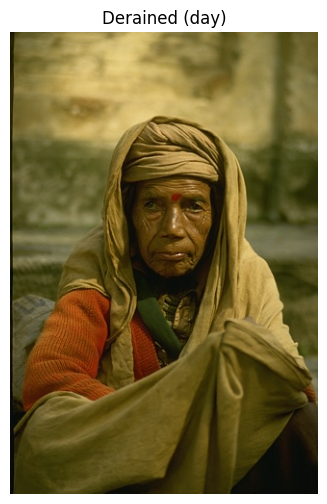

In [6]:
OUTPUT_DIR = "/kaggle/working/results/"
# Process single image
clf.derain_single(
    image_path="/kaggle/input/rain13kdataset/test/test/Rain100L/input/11.png",
    output_dir=OUTPUT_DIR,
    rlp_weights=RLP_WEIGHTS,
    nerd_weights=NERD_WEIGHTS,
    gt_dir="/kaggle/input/rain13kdataset/test/test/Rain100L/target"
)

In [7]:
MIX_IMG_DIR="/kaggle/input/data-mix-rain-with-gt/data_mix/test"
MIX_GT_DIR="/kaggle/input/data-mix-rain-with-gt/data_mix/gt"
OUTPUT_DIR_MULTI="/kaggle/working/multi/results/"
DATASET_NAME="mix"
    

clf.derain_auto(
    image_dir=MIX_IMG_DIR,
    output_dir=OUTPUT_DIR_MULTI + DATASET_NAME, 
    rlp_weights=RLP_WEIGHTS,
    nerd_weights=NERD_WEIGHTS,
    gt_dir=MIX_GT_DIR
)


📂 Found 7 images in /kaggle/input/data-mix-rain-with-gt/data_mix/test
🔍 Classifying into day/night...


Classifying: 100%|██████████| 7/7 [00:00<00:00, 11.76img/s]


✅ Classification done: 3 day, 4 night
⚙️ Enabling tile mode for night model (max image 1920x1080, free 14.0GB)

🚀 Running NIGHT model: RLP
✅ Night model done in 27.4s

🚀 Running DAY model: Improve-NeRD-Rain
✅ Day model done in 7.6s

🧹 Normalizing output...
📁 Normalized RLP output to: /kaggle/working/multi/results/mix
✅ All done!


In [8]:
evaluate(
    root_dir=OUTPUT_DIR_MULTI,
    gt_root_dir=MIX_GT_DIR,
    dataset=DATASET_NAME
)


📊 Evaluating dataset: mix


Processing mix: 100%|██████████| 7/7 [00:00<00:00,  9.67it/s]

✅ mix: PSNR = 40.6775, SSIM = 0.9854


(40.67747606549944, 0.985405581338065)